In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/.DS_Store
input/vgsales.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r"input/vgsales.csv")

In [4]:
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [5]:
df.shape

(16598, 11)

# data cleaning


In [6]:
df.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [7]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [8]:
# since we dont need year and publisher column we are droping null values
df.dropna(inplace=True)

In [9]:
df.shape

(16291, 11)

# data visualization

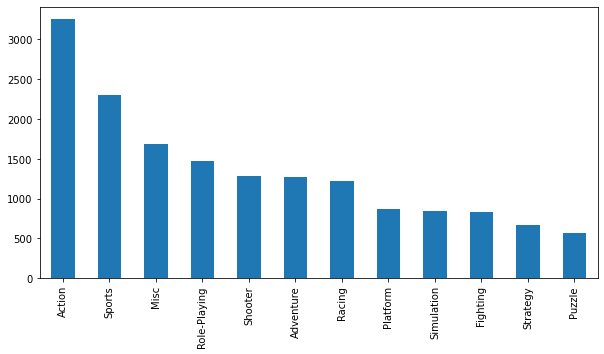

In [10]:

df['Genre'].value_counts().plot( kind='bar',figsize=(10,5))

### from the above graph we came to know that action type of genre are most interested to people

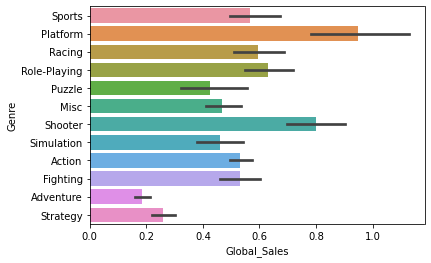

In [11]:
sns.barplot(x=df.Global_Sales,y=df.Genre)

### from the above graph we conclude that platform based video games are most sold across the globe

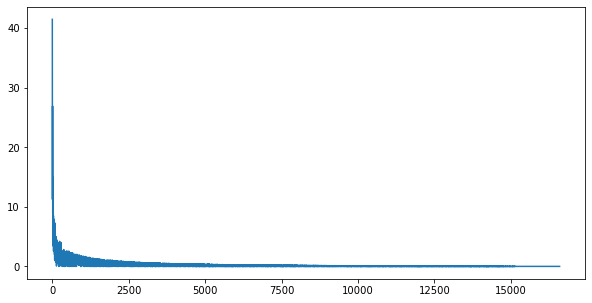

In [12]:

df['NA_Sales'].plot(figsize=(10,5))

### above we can see NA_Sales

 # data preprocessing 

In [13]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [14]:
l=LabelEncoder()

In [15]:
df['Genre']=l.fit_transform(df['Genre'])

In [16]:
df['Publisher']=l.fit_transform(df['Publisher'])

In [17]:
df.head()

Rank                      Name Platform    Year  Genre  Publisher  \
0     1                Wii Sports      Wii  2006.0     10        359   
1     2         Super Mario Bros.      NES  1985.0      4        359   
2     3            Mario Kart Wii      Wii  2008.0      6        359   
3     4         Wii Sports Resort      Wii  2009.0     10        359   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0      7        359   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

# feature selection

In [18]:
cor=df.corr()
cor

Rank      Year     Genre  Publisher  NA_Sales  EU_Sales  \
Rank          1.000000  0.178027 -0.055518  -0.023116 -0.400315 -0.379137   
Year          0.178027  1.000000 -0.125366   0.029802 -0.091285  0.006108   
Genre        -0.055518 -0.125366  1.000000  -0.051176  0.018057  0.017005   
Publisher    -0.023116  0.029802 -0.051176   1.000000  0.005370  0.013237   
NA_Sales     -0.400315 -0.091285  0.018057   0.005370  1.000000  0.768923   
EU_Sales     -0.379137  0.006108  0.017005   0.013237  0.768923  1.000000   
JP_Sales     -0.269323 -0.169387  0.030304   0.053019  0.451283  0.436379   
Other_Sales  -0.332735  0.041128  0.009802   0.014569  0.634518  0.726256   
Global_Sales -0.426975 -0.074647  0.022215   0.019368  0.941269  0.903264   

              JP_Sales  Other_Sales  Global_Sales  
Rank         -0.269323    -0.332735     -0.426975  
Year         -0.169387     0.041128     -0.074647  
Genre         0.030304     0.009802      0.022215  
Publisher     0.053019     0.014569      0.019368  
NA_Sales      0.451283     0.634518      0.941269  
EU_Sales      0.436379     0.726256      0.903264  
JP_Sales      1.000000     0.290559      0.612774  
Other_Sales   0.290559     1.000000      0.747964  
Global_Sales  0.612774     0.747964      1.000000

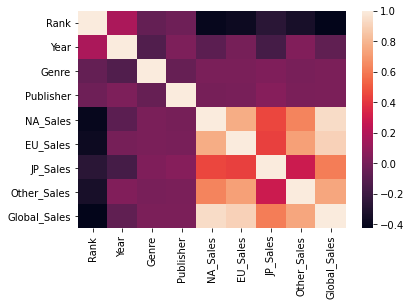

In [19]:
sns.heatmap(cor)

In [20]:
x=df.iloc[:,[4,5,6,7,8,9]]
y=df.iloc[:,[10]]

In [21]:
y

Global_Sales
0             82.74
1             40.24
2             35.82
3             33.00
4             31.37
...             ...
16593          0.01
16594          0.01
16595          0.01
16596          0.01
16597          0.01

[16291 rows x 1 columns]

# data scaling

In [22]:
sc=StandardScaler()

In [23]:
x=sc.fit_transform(x)

In [24]:
x

array([[ 1.34779580e+00,  3.79403919e-01,  5.01264692e+01,
         5.66915154e+01,  1.18355974e+01,  4.42535006e+01],
       [-2.46791921e-01,  3.79403919e-01,  3.50366150e+01,
         6.73935664e+00,  2.15832509e+01,  3.79621821e+00],
       [ 2.84737321e-01,  3.79403919e-01,  1.89496874e+01,
         2.50001694e+01,  1.18997267e+01,  1.71592217e+01],
       ...,
       [ 2.84737321e-01, -1.53412881e+00, -3.23011251e-01,
        -2.90074508e-01, -2.52775568e-01, -2.54771054e-01],
       [ 1.89726999e-02, -1.60772623e+00, -3.23011251e-01,
        -2.70439226e-01, -2.52775568e-01, -2.54771054e-01],
       [-2.46791921e-01,  1.42675172e+00, -3.10851819e-01,
        -2.90074508e-01, -2.52775568e-01, -2.54771054e-01]])

# models creation

## Regression model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [26]:
# lets start with the basic regression model i.e multiple regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
pred=lr.predict(x_test)
pred

array([[0.10016771],
       [0.09017833],
       [0.20036115],
       ...,
       [0.05040477],
       [0.17030558],
       [0.03026002]])

In [29]:
print(mean_squared_error(pred,y_test))

2.7510318796466363e-05


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


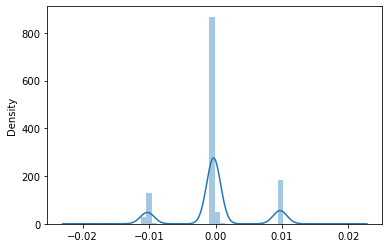

In [30]:
sns.distplot(y_test-pred)

## xgboost model

In [31]:
import xgboost

In [32]:
xgb=xgboost.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
pred1=xgb.predict(x_test)

In [34]:
pred1

array([0.10460794, 0.08777755, 0.19888747, ..., 0.04637271, 0.16621622,
       0.02878612], dtype=float32)

In [35]:
print(mean_squared_error(pred1,y_test))

0.04201058744694287


## decision tree model

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree= DecisionTreeRegressor()


In [37]:
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [38]:
pred2=tree.predict(x_test)
pred2

array([0.1 , 0.08, 0.2 , ..., 0.04, 0.17, 0.03])

In [39]:
print(mean_squared_error(pred2,y_test))

0.07168266664857617


#### from the  above mentioned few models multiple regression is giving us least error

### please do upvote if you like the procedure i have used.That motivates me to write more notebooks

## THANK YOU
